In [1]:
%matplotlib inline

import os, subprocess, tarfile
from glob import glob
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs
from xhistogram.xarray import histogram

import warnings
warnings.filterwarnings('ignore')

seconds_per_day=60.*60.*24.
seconds_per_year=365.*seconds_per_day
carbon_molar_mass=12.011
cobalt_n_2_c = 106./16.

In [2]:
ctrl={}
case={}

ctrl['path_root']='/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT'
ctrl['machine_target']='gfdl.ncrc4-intel19-prod'
ctrl['name']='OM4p5_CORE2_IAF_gzCOBALT-013022_cy5'

case['path_root']='/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2'
case['machine_target']='gfdl.ncrc4-intel19-prod'
case['name']='OM4p5_CORE2_IAF_gzCOBALT-tun_cy5'
case['name']='OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5'
case['name']='OM4p5_CORE2_IAF_gzCOBALT-hp_cy5'


In [3]:
short_casename=case['name'].replace('OM4p5_CORE2_IAF_','')
if short_casename=="gzCOBALT-060822":
    fig_casename='gzCOBALT-tun_cy1'
else:
    fig_casename=short_casename
print(short_casename, fig_casename)

gzCOBALT-hp_cy5 gzCOBALT-hp_cy5


In [4]:
phyto_varlist = ['di', 'smp', 'lgp']
zoo_varlist = ['smz', 'mdz', 'lgz', 'smt', 'lgt']

In [5]:
tmpdir = '/work/Jessica.Luo/tmp/'+case['name']
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5


In [6]:
# read in files
diagTypes = ['ocean_cobalt_omip_tracers_month_z', 'ocean_cobalt_omip_2d', \
             'ocean_cobalt_fluxes_int', 'ocean_cobalt_fdet_100', 'ocean_cobalt_tracers_int'] 

pp_dates=['1988-2007','2048-2067']

files=[glob(tmpdir + '/'+ d + '.' + pp_dates[0] + '*.nc') for d in diagTypes]
if not files:
    files=[glob(tmpdir + '/'+ d + '.' + pp_dates[1] + '*.nc') for d in diagTypes]
files=sorted([f for fi in files for f in fi]) # nested list comprehension
print(files)

['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_fdet_100.1988-2007.01.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_fdet_100.1988-2007.02.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_fdet_100.1988-2007.03.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_fdet_100.1988-2007.04.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_fdet_100.1988-2007.05.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_fdet_100.1988-2007.06.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_fdet_100.1988-2007.07.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_fdet_100.1988-2007.08.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_fdet_100.1988-2007.09.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_fdet_100.1988-2007.10.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-h

In [7]:
if not files:
    pp_path=os.path.join(case['path_root'], case['name'], case['machine_target'], 'pp')
    
    files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    files=sorted([f for fi in files for f in fi]) # nested list comprehension
    print(files)


In [8]:
grid_file=os.path.join(case['path_root'], case['name'], case['machine_target'], 'pp')+'/ocean_annual/ocean_annual.static.nc'
ds=xr.open_mfdataset(files, combine='by_coords')
grid=xr.open_dataset(grid_file)

In [9]:
tmpdir = '/work/Jessica.Luo/tmp/'+ctrl['name']
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)
    
# read in files
diagTypes = ['ocean_cobalt_omip_tracers_month_z', 'ocean_cobalt_omip_2d', \
             'ocean_cobalt_fluxes_int', 'ocean_cobalt_fdet_100', 'ocean_cobalt_tracers_int'] 

c_pp_dates='1988-2007'

c_files=[glob(tmpdir + '/'+ d + '.' + c_pp_dates + '*.nc') for d in diagTypes]

c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension

if not c_files:
    pp_path=os.path.join(ctrl['path_root'], ctrl['name'], ctrl['machine_target'], 'pp')
    
    c_files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + c_pp_dates + '*.nc') for d in diagTypes]
    
    c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension

#print(c_files)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5


In [10]:
dc=xr.open_mfdataset(c_files, combine='by_coords')

In [11]:
ds['depth_levels']=xr.DataArray(ds.z_i.diff(dim='z_i').values, coords={'z_l':ds.z_l.values}, dims=['z_l'], attrs={'long_name':'Thickness of depth bin', 'units':'meters'})

In [12]:
import string
alphabet=list(string.ascii_lowercase)

## Observations

In [13]:
obs_chl = xr.open_dataset('/work/jyl/validation_data/SO_Blended_Chl/globcolour_soblend_mc_esm4grid.nc')
obs_chl = obs_chl.mean(dim='time')

In [14]:
obs_no3 = xr.open_dataset('/work/jyl/validation_data/WOA/nitrate_woa_esm4grid.nc') # micromoles per kilogram, or micromol/L, equivalent to 1e-3 mol m-3
obs_po4 = xr.open_dataset('/work/jyl/validation_data/WOA/phosphate_woa_esm4grid.nc')
obs_sio3 = xr.open_dataset('/work/jyl/validation_data/WOA/silicate_woa_esm4grid.nc')

## Bias, RMSE, and Pearson's R calculations

In [15]:
from scipy.stats import pearsonr

In [16]:
chl_ann = ds.chl.mean(dim='time') * 1e6 # kg chl m-3 to mg chl m-3
no3_ann = ds.no3.mean(dim='time') * 1e3 # mol m-3 to micromol kg-1
po4_ann = ds.po4.mean(dim='time') * 1e3 # mol m-3 to micromol kg-1
sio3_ann = ds.si.mean(dim='time') * 1e3 # mol m-3 to micromol kg-1

c_chl_ann = dc.chl.mean(dim='time') * 1e6 # kg chl m-3 to mg chl m-3
c_no3_ann = dc.no3.mean(dim='time') * 1e3 # mol m-3 to micromol kg-1
c_po4_ann = dc.po4.mean(dim='time') * 1e3 # mol m-3 to micromol kg-1
c_sio3_ann = dc.si.mean(dim='time') * 1e3 # mol m-3 to micromol kg-1

In [17]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [18]:
# chlorophyll
log_gzchl = np.log10(chl_ann.isel(z_l=0))
log_obschl = np.log10(obs_chl.chl)
log_ctrlchl = np.log10(c_chl_ann.isel(z_l=0))

chl_bias = (log_gzchl - log_obschl).mean()
c_chl_bias = (log_ctrlchl - log_obschl).mean()
chl_rmse = rmse(log_gzchl, log_obschl)
c_chl_rmse = rmse(log_ctrlchl, log_obschl)

print('mean chlorophyll bias (GZ-COBALT): ' + str(np.round(chl_bias.values,3)) + ' and RMSE: ' + str(np.round(chl_rmse.values,3)))
print('mean chlorophyll bias (COBALT Ctrl): ' + str(np.round(c_chl_bias.values,3)) + ' and RMSE: '+ str(np.round(c_chl_rmse.values,3)))

mean chlorophyll bias (GZ-COBALT): -0.084 and RMSE: 0.345
mean chlorophyll bias (COBALT Ctrl): -0.017 and RMSE: 0.345


In [19]:
X=np.log10(chl_ann.isel(z_l=0).stack(z=('xh','yh')))
Y=np.log10(obs_chl.chl.stack(z=('xh','yh')))
mask = np.logical_and(~np.isnan(X.values),~np.isnan(Y.values))
chl_pearsonsR = pearsonr(X[mask], Y[mask])[0]

X=np.log10(c_chl_ann.isel(z_l=0).stack(z=('xh','yh')))
Y=np.log10(obs_chl.chl.stack(z=('xh','yh')))
mask = np.logical_and(~np.isnan(X.values),~np.isnan(Y.values))
c_chl_pearsonsR = pearsonr(X[mask], Y[mask])[0]

print('chlorophyll correlation (GZ-COBALT): ' + str(np.round(chl_pearsonsR,3)))
print('chlorophyll correlation (COBALT Ctrl): ' + str(np.round(c_chl_pearsonsR,3)))

chlorophyll correlation (GZ-COBALT): 0.745
chlorophyll correlation (COBALT Ctrl): 0.726


In [20]:
# no3
no3_bias = (no3_ann.isel(z_l=0) - obs_no3.n_an.isel(z_l=0)).mean()
c_no3_bias = (c_no3_ann.isel(z_l=0) - obs_no3.n_an.isel(z_l=0)).mean()
no3_rmse = rmse(no3_ann.isel(z_l=0),obs_no3.n_an.isel(z_l=0))
c_no3_rmse = rmse(c_no3_ann.isel(z_l=0),obs_no3.n_an.isel(z_l=0))

print('mean no3 bias (GZ-COBALT): ' + str(np.round(no3_bias.values,3)) + ' and RMSE: ' + str(np.round(no3_rmse.values,2)))
print('mean no3 bias (COBALT Ctrl): ' + str(np.round(c_no3_bias.values,3)) + ' and RMSE: '+ str(np.round(c_no3_rmse.values,2)))

mean no3 bias (GZ-COBALT): -0.772 and RMSE: 2.32
mean no3 bias (COBALT Ctrl): -0.131 and RMSE: 2.06


In [21]:
X=no3_ann.isel(z_l=0).stack(z=('xh','yh'))
Y=obs_no3.n_an.isel(z_l=0).stack(z=('xh','yh'))
mask = np.logical_and(~np.isnan(X.values),~np.isnan(Y.values))
no3_pearsonsR = pearsonr(X[mask], Y[mask])[0]

X=c_no3_ann.isel(z_l=0).stack(z=('xh','yh'))
Y=obs_no3.n_an.isel(z_l=0).stack(z=('xh','yh'))
mask = np.logical_and(~np.isnan(X.values),~np.isnan(Y.values))
c_no3_pearsonsR = pearsonr(X[mask], Y[mask])[0]

print('no3 correlation (GZ-COBALT): ' + str(np.round(no3_pearsonsR,3)))
print('no3 correlation (COBALT Ctrl): ' + str(np.round(c_no3_pearsonsR,3)))

no3 correlation (GZ-COBALT): 0.976
no3 correlation (COBALT Ctrl): 0.979


In [22]:
# po4
po4_bias = (po4_ann.isel(z_l=0) - obs_po4.p_an.isel(z_l=0)).mean()
c_po4_bias = (c_po4_ann.isel(z_l=0) - obs_po4.p_an.isel(z_l=0)).mean()
po4_rmse = rmse(po4_ann.isel(z_l=0),obs_po4.p_an.isel(z_l=0))
c_po4_rmse = rmse(c_po4_ann.isel(z_l=0),obs_po4.p_an.isel(z_l=0))

print('mean po4 bias (GZ-COBALT): ' + str(np.round(po4_bias.values,3)) + ' and RMSE: ' + str(np.round(po4_rmse.values,3)))
print('mean po4 bias (COBALT Ctrl): ' + str(np.round(c_po4_bias.values,3)) + ' and RMSE: '+ str(np.round(c_po4_rmse.values,3)))

mean po4 bias (GZ-COBALT): -0.164 and RMSE: 0.259
mean po4 bias (COBALT Ctrl): -0.111 and RMSE: 0.215


In [23]:
X=po4_ann.isel(z_l=0).stack(z=('xh','yh'))
Y=obs_po4.p_an.isel(z_l=0).stack(z=('xh','yh'))
mask = np.logical_and(~np.isnan(X.values),~np.isnan(Y.values))
po4_pearsonsR = pearsonr(X[mask], Y[mask])[0]

X=c_po4_ann.isel(z_l=0).stack(z=('xh','yh'))
Y=obs_po4.p_an.isel(z_l=0).stack(z=('xh','yh'))
mask = np.logical_and(~np.isnan(X.values),~np.isnan(Y.values))
c_po4_pearsonsR = pearsonr(X[mask], Y[mask])[0]

print('po4 correlation (GZ-COBALT): ' + str(np.round(po4_pearsonsR,3)))
print('po4 correlation (COBALT Ctrl): ' + str(np.round(c_po4_pearsonsR,3)))

po4 correlation (GZ-COBALT): 0.957
po4 correlation (COBALT Ctrl): 0.964


In [24]:
# sio3
sio3_bias = (sio3_ann.isel(z_l=0) - obs_sio3.i_an.isel(z_l=0)).mean()
c_sio3_bias = (c_sio3_ann.isel(z_l=0) - obs_sio3.i_an.isel(z_l=0)).mean()
sio3_rmse = rmse(sio3_ann.isel(z_l=0),obs_sio3.i_an.isel(z_l=0))
c_sio3_rmse = rmse(c_sio3_ann.isel(z_l=0),obs_sio3.i_an.isel(z_l=0))

print('mean sio3 bias (GZ-COBALT): ' + str(np.round(sio3_bias.values,3)) + ' and RMSE: ' + str(np.round(sio3_rmse.values,3)))
print('mean sio3 bias (COBALT Ctrl): ' + str(np.round(c_sio3_bias.values,3)) + ' and RMSE: '+ str(np.round(c_sio3_rmse.values,3)))

mean sio3 bias (GZ-COBALT): 2.284 and RMSE: 8.0
mean sio3 bias (COBALT Ctrl): 2.093 and RMSE: 8.132


In [25]:
X=sio3_ann.isel(z_l=0).stack(z=('xh','yh'))
Y=obs_sio3.i_an.isel(z_l=0).stack(z=('xh','yh'))
mask = np.logical_and(~np.isnan(X.values),~np.isnan(Y.values))
sio3_pearsonsR = pearsonr(X[mask], Y[mask])[0]

X=c_sio3_ann.isel(z_l=0).stack(z=('xh','yh'))
Y=obs_sio3.i_an.isel(z_l=0).stack(z=('xh','yh'))
mask = np.logical_and(~np.isnan(X.values),~np.isnan(Y.values))
c_sio3_pearsonsR = pearsonr(X[mask], Y[mask])[0]

print('sio3 correlation (GZ-COBALT): ' + str(np.round(sio3_pearsonsR,3)))
print('sio3 correlation (COBALT Ctrl): ' + str(np.round(c_sio3_pearsonsR,3)))

sio3 correlation (GZ-COBALT): 0.944
sio3 correlation (COBALT Ctrl): 0.941


## Figure - Compare surface chlorophyll and nutrients with control and with obs

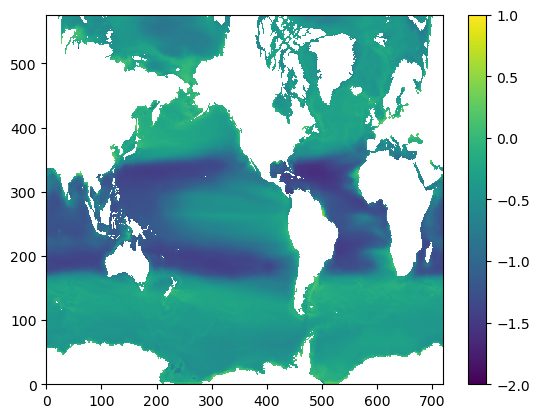

In [82]:
plt.pcolormesh(np.log10(chl_ann.isel(z_l=0)),vmax=1,vmin=-2)
plt.colorbar()

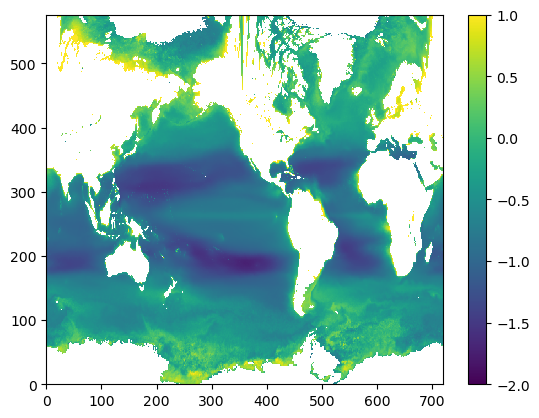

In [83]:
plt.pcolormesh(np.log10(obs_chl.chl),vmax=1,vmin=-2)
plt.colorbar()

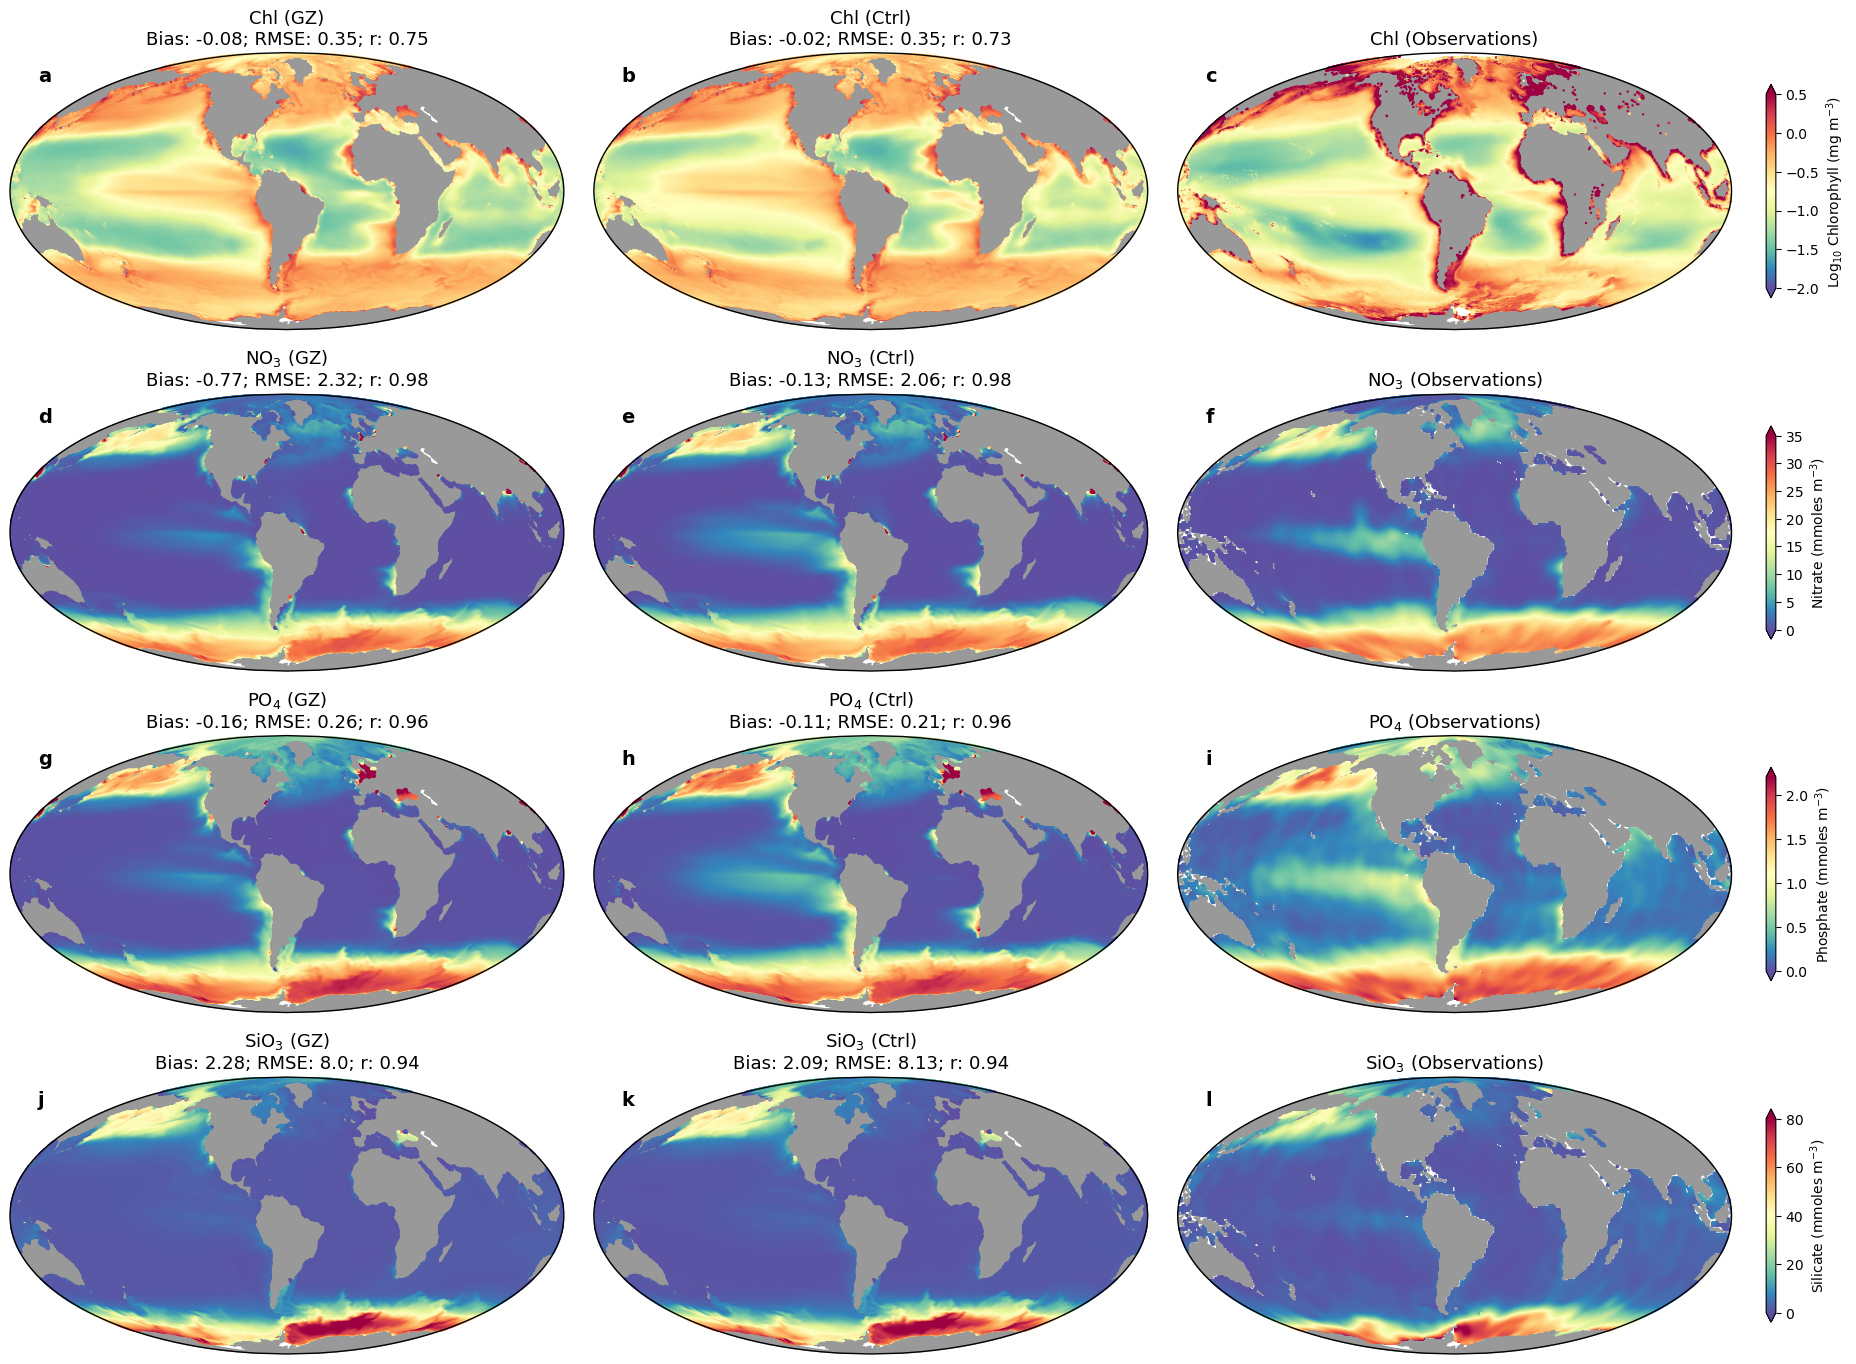

In [84]:
fig=plt.figure(figsize=(24,17))
gs=gridspec.GridSpec(4,3, wspace=0.05, width_ratios=[1,1,1.25])

ax={};cs={}

# Chl
i=0
ax[i] = plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=np.log10(chl_ann.isel(z_l=0)), transform=ccrs.PlateCarree(), vmin=-2,vmax=.5, cmap='Spectral_r')
ax[i].set_title('Chl (GZ)\nBias: ' + str(np.round(chl_bias.values,2)) + '; RMSE: ' + str(np.round(chl_rmse.values,2)) + '; r: ' + str(np.round(chl_pearsonsR,2)), fontsize=13)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

i=1
ax[i] = plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=np.log10(c_chl_ann.isel(z_l=0)), transform=ccrs.PlateCarree(), vmin=-2,vmax=.5, cmap='Spectral_r')
ax[i].set_title('Chl (Ctrl)\nBias: ' + str(np.round(c_chl_bias.values,2)) + '; RMSE: ' + str(np.round(c_chl_rmse.values,2)) + '; r: ' + str(np.round(c_chl_pearsonsR,2)), fontsize=13)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

i=2
ax[i] = plt.subplot(gs[0,2],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=np.log10(obs_chl.chl), transform=ccrs.PlateCarree(), vmin=-2,vmax=.5, cmap='Spectral_r')
ax[i].set_title('Chl (Observations)', fontsize=13)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

cb1 =plt.colorbar(cs[i], shrink=0.75, extend='both')
cb1.ax.set_ylabel('Log$_{10}$ Chlorophyll (mg m$^{-3}$)')


# NO3
i=3
ax[i] = plt.subplot(gs[1,0],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=no3_ann.isel(z_l=0), transform=ccrs.PlateCarree(), vmin=0,vmax=35, cmap='Spectral_r')
ax[i].set_title('NO$_3$ (GZ)\nBias: ' + str(np.round(no3_bias.values,2)) + '; RMSE: ' + str(np.round(no3_rmse.values,2)) + '; r: ' + str(np.round(no3_pearsonsR,2)), fontsize=13)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

i=4
ax[i] = plt.subplot(gs[1,1],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=c_no3_ann.isel(z_l=0), transform=ccrs.PlateCarree(), vmin=0,vmax=35, cmap='Spectral_r')
ax[i].set_title('NO$_3$ (Ctrl)\nBias: ' + str(np.round(c_no3_bias.values,2)) + '; RMSE: ' + str(np.round(c_no3_rmse.values,2)) + '; r: ' + str(np.round(c_no3_pearsonsR,2)), fontsize=13)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

i=5
ax[i] = plt.subplot(gs[1,2],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=obs_no3.n_an.isel(z_l=0), transform=ccrs.PlateCarree(), vmin=0,vmax=35, cmap='Spectral_r')
ax[i].set_title('NO$_3$ (Observations)', fontsize=13)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

cb2 = plt.colorbar(cs[i], shrink=0.75, extend='both')
cb2.ax.set_ylabel('Nitrate (mmoles m$^{-3}$)')


# PO4
i=6
ax[i] = plt.subplot(gs[2,0],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=po4_ann.isel(z_l=0), transform=ccrs.PlateCarree(), vmin=0,vmax=2.2, cmap='Spectral_r')
ax[i].set_title('PO$_4$ (GZ)\nBias: ' + str(np.round(po4_bias.values,2)) + '; RMSE: ' + str(np.round(po4_rmse.values,2)) + '; r: ' + str(np.round(po4_pearsonsR,2)), fontsize=13)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

i=7
ax[i] = plt.subplot(gs[2,1],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=c_po4_ann.isel(z_l=0), transform=ccrs.PlateCarree(), vmin=0,vmax=2.2, cmap='Spectral_r')
ax[i].set_title('PO$_4$ (Ctrl)\nBias: ' + str(np.round(c_po4_bias.values,2)) + '; RMSE: ' + str(np.round(c_po4_rmse.values,2)) + '; r: ' + str(np.round(po4_pearsonsR,2)), fontsize=13)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

i=8
ax[i] = plt.subplot(gs[2,2],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=obs_po4.p_an.isel(z_l=0), transform=ccrs.PlateCarree(), vmin=0,vmax=2.2, cmap='Spectral_r')
ax[i].set_title('PO$_4$ (Observations)', fontsize=13)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

cb3 = plt.colorbar(cs[i], shrink=0.75, extend='both')
cb3.ax.set_ylabel('Phosphate (mmoles m$^{-3}$)')

# SiO3
i=9
ax[i] = plt.subplot(gs[3,0],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=sio3_ann.isel(z_l=0), transform=ccrs.PlateCarree(), vmin=0,vmax=80, cmap='Spectral_r')
ax[i].set_title('SiO$_3$ (GZ)\nBias: ' + str(np.round(sio3_bias.values,2)) + '; RMSE: ' + str(np.round(sio3_rmse.values,2)) + '; r: ' + str(np.round(sio3_pearsonsR,2)), fontsize=13)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

i=10
ax[i] = plt.subplot(gs[3,1],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=c_sio3_ann.isel(z_l=0), transform=ccrs.PlateCarree(), vmin=0,vmax=80, cmap='Spectral_r')
ax[i].set_title('SiO$_3$ (Ctrl)\nBias: ' + str(np.round(c_sio3_bias.values,2)) + '; RMSE: ' + str(np.round(c_sio3_rmse.values,2)) + '; r: ' + str(np.round(c_sio3_pearsonsR,2)), fontsize=13)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

i=11
ax[i] = plt.subplot(gs[3,2],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=obs_sio3.i_an.isel(z_l=0), transform=ccrs.PlateCarree(), vmin=0,vmax=80, cmap='Spectral_r')
ax[i].set_title('SiO$_3$ (Observations)', fontsize=13)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

cb4 = plt.colorbar(cs[i], shrink=0.75, extend='both')
cb4.ax.set_ylabel('Silicate (mmoles m$^{-3}$)')

plt.tight_layout()
plt.savefig('plots/'+fig_casename+'_'+pp_dates[0]+'_SurfaceChl_Nutrients.png', dpi=300, bbox_inches='tight')